In [14]:
import pandas as pd #for EDA

In [17]:
abiturnoten_2010 = pd.read_csv("./data/Converted to CSV/Aus_Abiturnoten_2022/Noten-Table 1.csv",
                   encoding='latin-1', delimiter=(';'))
abiturnoten_2010.head(14)

,Land,BW,BY,BE,BB,HB,HH,HE,MV,NI,NW,RP,SL,SN,ST,SH,TH
0,Zahl der PrÃ¼fungen,43.507,39.715,14.644,9.619,2.784,9.210,19.347,5.247,30.456,80.525,16.231,3.325,13.404,5.643,11.748,6.399
1,- bestanden,42.464,38.463,14.128,9.103,2.652,8.936,18.676,4.884,29.125,76.909,15.499,3.176,12.908,5.362,11.210,6.292
2,- nicht bestanden (abs.),1.043,1.252,516,516,132,274,671,363,1.331,3.616,732,149,496,281,538,107
3,- nicht bestanden (%),"2,4","3,2","3,5","5,4","4,7","3,0","3,5","6,9","4,4","4,5","4,5","4,5","3,7","5,0","4,6","1,7"
4,Notenmittel,"2,23","2,20","2,22","2,15","2,32","2,28","2,23","2,21","2,38","2,36","2,38","2,26","2,11","2,24","2,42","2,04"
5,Note,HÃ¤ufigkeit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"1,0",1.588,1.312,583,379,120,255,834,212,674,2.436,373,138,542,176,224,299
7,"1,1",832,686,293,183,47,159,409,87,373,1.238,216,57,266,100,129,175
8,"1,2",1.067,928,366,231,51,187,522,93,484,1.494,293,83,388,132,178,241
9,"1,3",1.225,1.118,448,293,52,255,602,138,650,1.798,360,81,477,151,197,224


In [18]:
noten2010 = abiturnoten_2010.iloc[6:37].copy() #for further analysis we need only the grades so we use iloc for rows and columns
# and we also make a copy of the original dataframe in a new variable called noten2010

In [19]:
noten2010.head() #now we only have the needed rows and columns

,Land,BW,BY,BE,BB,HB,HH,HE,MV,NI,NW,RP,SL,SN,ST,SH,TH
6,"1,0",1.588,1.312,583,379,120,255,834,212,674,2.436,373,138,542,176,224,299
7,"1,1",832,686,293,183,47,159,409,87,373,1.238,216,57,266,100,129,175
8,"1,2",1.067,928,366,231,51,187,522,93,484,1.494,293,83,388,132,178,241
9,"1,3",1.225,1.118,448,293,52,255,602,138,650,1.798,360,81,477,151,197,224
10,"1,4",1.352,1.231,453,328,83,264,596,154,741,2.046,368,100,486,172,239,313


In [20]:
noten2010 = noten2010.rename(columns={'Land': 'Noten'})

In [21]:
noten2010.iloc[:, 1:] = noten2010.iloc[:, 1:].apply(lambda x: x.str.replace('.', '')) 

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1594/4168589566.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  noten2010.iloc[:, 1:] = noten2010.iloc[:, 1:].apply(lambda x: x.str.replace('.', ''))


In [22]:
noten2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 6 to 36
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Noten   31 non-null     object
 1   BW      31 non-null     object
 2   BY      31 non-null     object
 3   BE      31 non-null     object
 4   BB      31 non-null     object
 5   HB      31 non-null     object
 6   HH      31 non-null     object
 7   HE      31 non-null     object
 8   MV      31 non-null     object
 9   NI      31 non-null     object
 10  NW      31 non-null     object
 11  RP      31 non-null     object
 12  SL      31 non-null     object
 13  SN      31 non-null     object
 14  ST      31 non-null     object
 15  SH      31 non-null     object
 16  TH      31 non-null     object
dtypes: object(17)
memory usage: 4.2+ KB


In [23]:
# the datatypes are set to objects
# so we will have to replace all the commas to dots 
noten2010 = noten2010.apply(lambda x: x.str.replace(',','.'))
noten2010.head()

,Noten,BW,BY,BE,BB,HB,HH,HE,MV,NI,NW,RP,SL,SN,ST,SH,TH
6,1.0,1588,1312,583,379,120,255,834,212,674,2436,373,138,542,176,224,299
7,1.1,832,686,293,183,47,159,409,87,373,1238,216,57,266,100,129,175
8,1.2,1067,928,366,231,51,187,522,93,484,1494,293,83,388,132,178,241
9,1.3,1225,1118,448,293,52,255,602,138,650,1798,360,81,477,151,197,224
10,1.4,1352,1231,453,328,83,264,596,154,741,2046,368,100,486,172,239,313


In [24]:
noten2010.describe()

,Noten,BW,BY,BE,BB,HB,HH,HE,MV,NI,NW,RP,SL,SN,ST,SH,TH
count,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
unique,31,31,31,29,28,28,28,29,25,30,31,29,27,28,27,31,28
top,1.0,1588,1312,0,0,120,255,1,0,1,2436,796,0,0,0,224,0
freq,1,1,1,2,3,2,2,2,3,2,1,2,3,3,4,1,3


In [ ]:
#this is unusual describe output
# the reason why this happens is that the datatypes are objects or str

In [25]:
# to fix the issue we have convert the columns to float
noten2010[['BW','BY','BE','BB','HB','HH','HE','MV','NI','NW','RP','SL','SN','ST','SH','TH']] = noten2010[['BW','BY','BE','BB','HB','HH','HE','MV','NI','NW','RP','SL','SN','ST','SH','TH']].astype(int)

In [26]:
# to fix the issue we have convert the columns to float
noten2010['Noten'] = noten2010['Noten'].astype(float)

In [27]:
noten2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 6 to 36
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Noten   31 non-null     float64
 1   BW      31 non-null     int64  
 2   BY      31 non-null     int64  
 3   BE      31 non-null     int64  
 4   BB      31 non-null     int64  
 5   HB      31 non-null     int64  
 6   HH      31 non-null     int64  
 7   HE      31 non-null     int64  
 8   MV      31 non-null     int64  
 9   NI      31 non-null     int64  
 10  NW      31 non-null     int64  
 11  RP      31 non-null     int64  
 12  SL      31 non-null     int64  
 13  SN      31 non-null     int64  
 14  ST      31 non-null     int64  
 15  SH      31 non-null     int64  
 16  TH      31 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.2 KB


Short explanation of the describe measures:
- count: Indication of how many values are present in the columns (NaNs/missing values are not counted).
- mean: average value of the data
- std: standard deviation of the data
- min: the smallest value in the data set
- 25%: 25 % of the data are below this value
- 50%: 50% of the data are below this value. This value is called the median.
- 75%: 75% of the data are below this value
- max: the largest expression in the data set

In [28]:
noten2010.describe()

,Noten,BW,BY,BE,BB,HB,HH,HE,MV,NI,NW,RP,SL,SN,ST,SH,TH
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2.500000,1369.806452,1240.741935,455.741935,293.645161,85.548387,288.258065,602.451613,157.548387,939.516129,2480.935484,499.967742,102.451613,416.387097,172.967742,361.612903,202.967742
std,0.909212,735.762752,737.431170,246.778709,186.560365,45.458288,152.532175,310.583412,96.574613,526.016088,1270.961655,265.063072,55.395450,259.963802,101.304651,207.182959,131.076182
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.750000,923.500000,680.000000,324.000000,139.500000,51.500000,177.500000,436.000000,85.000000,567.000000,1646.000000,326.500000,69.000000,213.500000,109.500000,203.500000,71.000000
50%,2.500000,1588.000000,1406.000000,564.000000,348.000000,99.000000,352.000000,711.000000,190.000000,1002.000000,2740.000000,600.000000,130.000000,486.000000,194.000000,382.000000,241.000000
75%,3.250000,2015.000000,1878.000000,658.000000,440.500000,121.500000,408.000000,850.000000,230.000000,1377.000000,3576.500000,729.500000,142.000000,633.500000,267.000000,549.500000,313.500000
max,4.000000,2219.000000,2116.000000,718.000000,513.000000,143.000000,475.000000,941.000000,288.000000,1617.000000,3946.000000,806.000000,173.000000,745.000000,294.000000,628.000000,366.000000


In [ ]:
# now we have the correct describe output

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') 

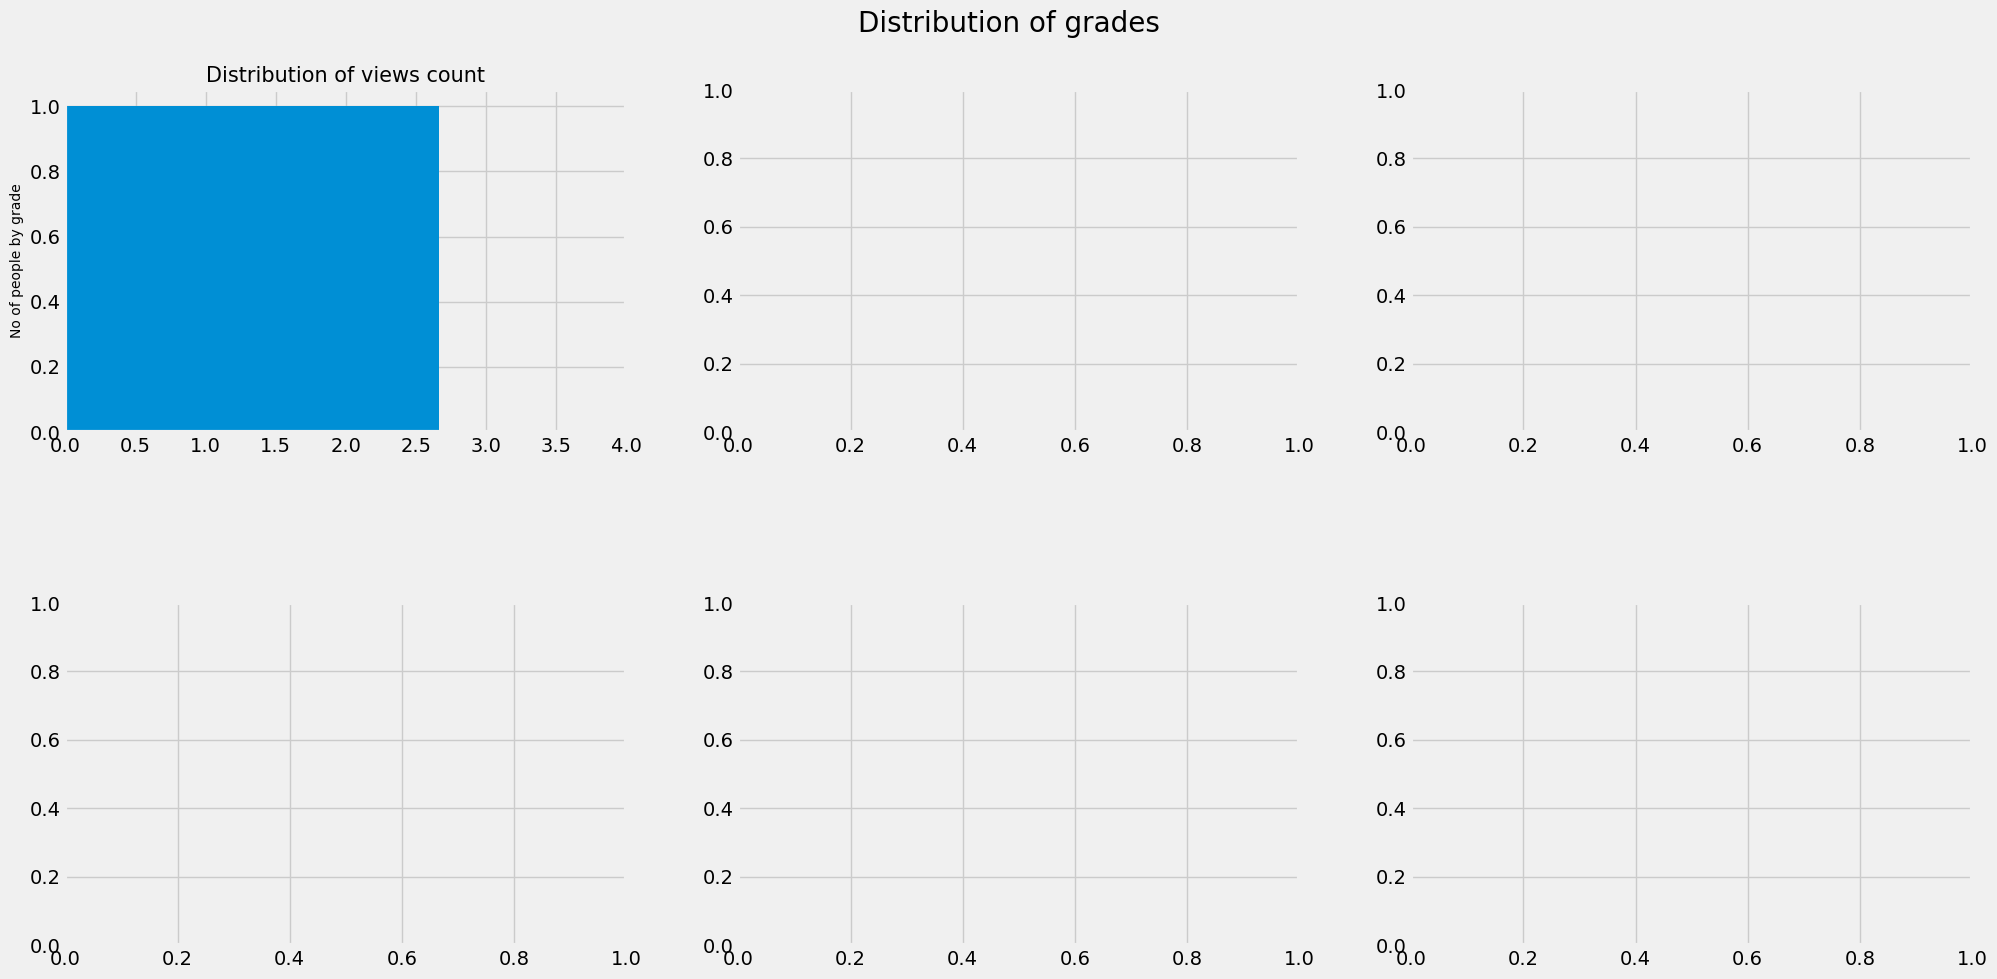

In [30]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of grades', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x=noten2010['BW'], bins=832)  # creates histogram for number of frequency
ax[0][0].set_ylabel("No of people by grade", fontsize = 10) # sets the label y-axis
ax[0][0].set_xlim(0,4.000000) # limits the x-axis values from 0 to 1000000 
ax[0][0].set_title("Distribution of views count", fontsize = 15);  # sets title for subplot

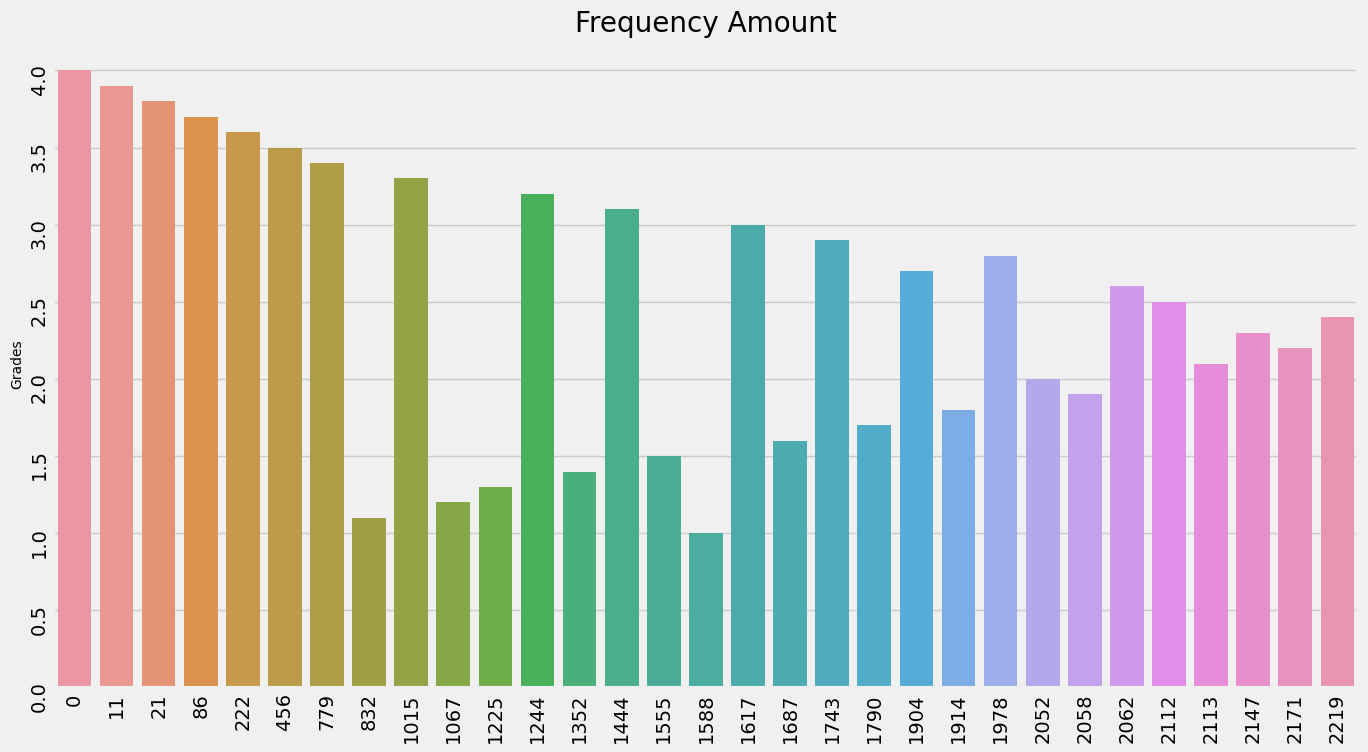

In [31]:
# Plot number of videos per category
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.barplot(x=noten2010['BW'], y=noten2010['Noten']) # create countplot
f1.tick_params(axis=('both'), rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis 
f1.set_ylabel("Grades", fontsize = 10); # set label for y-axis
f1.set_title('Frequency Amount', fontsize=20); # set title

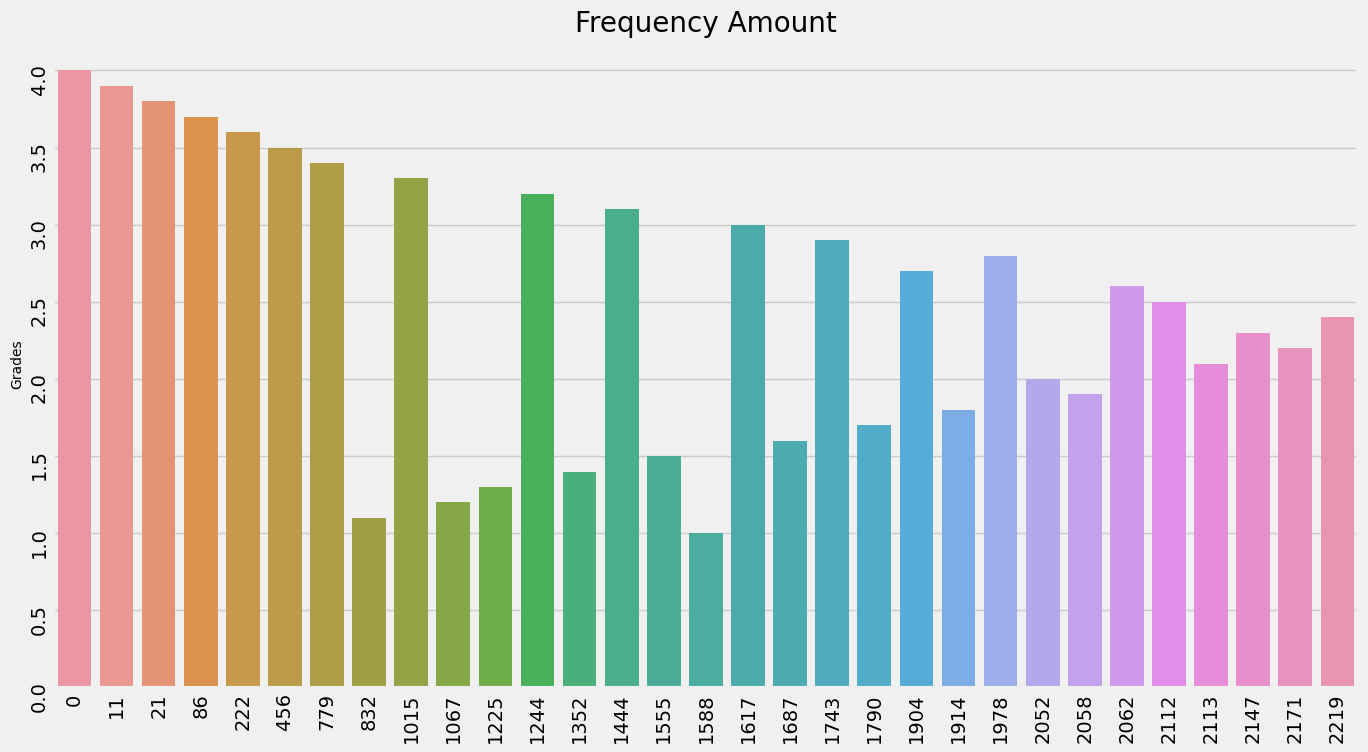

In [32]:
# Plot number of videos per category
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.barplot(x=noten2010['BW'], y=noten2010['Noten']) # create plot
f1.tick_params(axis=('both'), rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis
f1.set_ylabel("Grades", fontsize = 10); # set label for y-axis
f1.set_title('Frequency Amount', fontsize=20); # set title

In [33]:
#input custom functions
import eda_express
import add_year

In [35]:
abiturnoten_2022 = eda_express.read_csv_file('./data/Converted to CSV/Aus_Abiturnoten_2022/Noten-Table 1.csv')
abiturnoten_2022.head()

/Users/david/Documents/capstone_project_hh_23_1/eda_express.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_copy.iloc[:, 1:] = df_copy.iloc[:, 1:].apply(lambda x: x.str.replace('.', ''))
/Users/david/Documents/capstone_project_hh_23_1/eda_express.py:20: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy.iloc[:,0] = df_copy.iloc[:,0].astype(float)
/Users/david/Documents/capstone_project_hh_23_1/eda_express.py:23: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns

,Noten,BW,BY,BE,BB,HB,HH,HE,MV,NI,NW,RP,SL,SN,ST,SH,TH
6,1.0,1588,1312,583,379,120,255,834,212,674,2436,373,138,542,176,224,299
7,1.1,832,686,293,183,47,159,409,87,373,1238,216,57,266,100,129,175
8,1.2,1067,928,366,231,51,187,522,93,484,1494,293,83,388,132,178,241
9,1.3,1225,1118,448,293,52,255,602,138,650,1798,360,81,477,151,197,224
10,1.4,1352,1231,453,328,83,264,596,154,741,2046,368,100,486,172,239,313


In [36]:
abiturnoten_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 6 to 36
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Noten   31 non-null     float64
 1   BW      31 non-null     int64  
 2   BY      31 non-null     int64  
 3   BE      31 non-null     int64  
 4   BB      31 non-null     int64  
 5   HB      31 non-null     int64  
 6   HH      31 non-null     int64  
 7   HE      31 non-null     int64  
 8   MV      31 non-null     int64  
 9   NI      31 non-null     int64  
 10  NW      31 non-null     int64  
 11  RP      31 non-null     int64  
 12  SL      31 non-null     int64  
 13  SN      31 non-null     int64  
 14  ST      31 non-null     int64  
 15  SH      31 non-null     int64  
 16  TH      31 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.2 KB


In [37]:
abiturnoten_2022 = add_year.add_year(abiturnoten_2022, 'year', 2022)
abiturnoten_2022.head()

,Noten,BW,BY,BE,BB,HB,HH,HE,MV,NI,NW,RP,SL,SN,ST,SH,TH,year
6,1.0,1588,1312,583,379,120,255,834,212,674,2436,373,138,542,176,224,299,2022
7,1.1,832,686,293,183,47,159,409,87,373,1238,216,57,266,100,129,175,2022
8,1.2,1067,928,366,231,51,187,522,93,484,1494,293,83,388,132,178,241,2022
9,1.3,1225,1118,448,293,52,255,602,138,650,1798,360,81,477,151,197,224,2022
10,1.4,1352,1231,453,328,83,264,596,154,741,2046,368,100,486,172,239,313,2022


In [38]:
abiturnoten_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 6 to 36
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Noten   31 non-null     float64
 1   BW      31 non-null     int64  
 2   BY      31 non-null     int64  
 3   BE      31 non-null     int64  
 4   BB      31 non-null     int64  
 5   HB      31 non-null     int64  
 6   HH      31 non-null     int64  
 7   HE      31 non-null     int64  
 8   MV      31 non-null     int64  
 9   NI      31 non-null     int64  
 10  NW      31 non-null     int64  
 11  RP      31 non-null     int64  
 12  SL      31 non-null     int64  
 13  SN      31 non-null     int64  
 14  ST      31 non-null     int64  
 15  SH      31 non-null     int64  
 16  TH      31 non-null     int64  
 17  year    31 non-null     int64  
dtypes: float64(1), int64(17)
memory usage: 4.5 KB


In [39]:
from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'pandas_profiling'

In [40]:
profile = ProfileReport(abiturnoten_2022)

NameError: name 'ProfileReport' is not defined

In [41]:
profile.to_notebook_iframe

NameError: name 'profile' is not defined